In [1]:
from peft import *
from sentence_transformers  import SentenceTransformer,CrossEncoder
from sentence_transformers.util import semantic_search
import torch
import json
import os
from bs4 import BeautifulSoup,PageElement,Comment,NavigableString
import pandas as pd
cache_dir = './model/'

def pd_full_screen():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    
def pd_normal_screen():
    pd.set_option('display.max_rows', 10)
    pd.set_option('display.max_columns', 5)

No ROCm runtime is found, using ROCM_HOME='/usr'


In [ ]:
#model_name_bi_encoder = 'mixedbread-ai/mxbai-embed-large-v1'
#model_name_bi_encoder = 'sentence-transformers/stsb-xlm-r-multilingual'
#model_name_bi_encoder = 'intfloat/multilingual-e5-large-instruct'
model_name_bi_encoder = 'all-mpnet-base-v2'


DEVICE = 'cuda'
bi_encoder = SentenceTransformer(model_name_bi_encoder,cache_folder=cache_dir,device=DEVICE)#.to(DEVICE)

In [ ]:
bi_encoder = bi_encoder.half()
bi_encoder

In [2]:
def dict_to_str(p):
    s = "{"
    for k, v in p.items():
        s += f'"{k}":"{v}",'
        pass

    s += "}"
    return s
__cover__letter = """
I am currently pursuing a Master's degree in Artificial Intelligence at Friedrich-Alexander-Universität (FAU) in Erlangen, specializing in Natural Language Processing. I have hands-on experience with Retrieval-Augmented Generation (RAG) and fine-tuning large language models (LLMs). Additionally, I have worked with audio and image processing in deep learning, particularly with multimodal models.
"""
__email ="majid.sharghi.business@gmail.com"
person = {
    "full name":"Majid Sharghi Foroushani",
    "first name": "Majid",
    "last name": "sharghi foroushani",
    "pronoun": "he",
    "title":"Mr",
    "person title":"Mr",
    
    "birthdate": "10/08/1997",
    "age": "27",
    "sex": "male",
    
    "skills": "Deep Learning, NLP, LLM",
    "qualification":"Computer science",
    "country": "Germany",
    "location and address": "Philip-9",
    "house number":"9",
    "city": "Erlangen",
    "zip and postcode":"91052",
    
    "telephone number": "17634455082",
    "available from and start date": "6/24/2024",
    "notice preiod":"6/24/2024",
    
    "salary": "30000",
    
    "German language level": "A1",
    "English language level": "C1",
    
    "visa": "I do not need visa.",
    
    "email": __email,
    "password": "65r6iY$_q#D5Pdm",
    
    "how did you find us": "google",
    "xing": "www.xing.com",
    "job title": "Machine learning engineer",
    "university": "university of erlangen",
    

    "additional information":"",
    "summary":"",
    
    
    "linkedin": "https://www.linkedin.com/in/majidsh/",
    "github": "https://github.com/majidsh97/Projects",
    "twitter": "",
    "company":"www.meetup.asia",
    "website":"www.meetup.asia",
    "google drive":"",
    "dropbox":"",
    
    
    
    
    
    
    "cv": 'D:\\Python Projects\\LinkedinBot\\LinkedinBot\\files\\cv\\majid_cv.pdf',
    "picture":'D:\\Python Projects\\LinkedinBot\\LinkedinBot\\files\\pic.jpg',
    "transcript":"D:\\Python Projects\\LinkedinBot\\LinkedinBot\\files\\transcript\\transcript.pdf",
    "university enrollment":"D:\\Python Projects\\LinkedinBot\\LinkedinBot\\files\\transcript\\2024-04-11 Immatrikulationsbescheinigung.pdf",
    
    "cover letter": __cover__letter,
    
    
    "years of experience": "4 years in deep learning",
    "username":__email,
    
    "website language":"english",
    
    "italian language level":"A2",
    
    "ethnicity":"white",
    "career level":"entry",
    "recommender":"I do not have recommender",
    'work here before':"No",
    "work hours":"20",
    "work duration":"6 months",
    "willing to relocate":"yes",
    "distance":"50 km",
    "forgot password":"no",
    "graduation year":"2024",
    "current semester":"first semester",
    "civic number":"1",
    "do not fill this":"",

    
}

person["upload resume"]=person['cv']
# {'years of experience', 'forgot password', 'next', 'username', 'website language', 'latitude', 'distance', 'transcript', 'english language level', 'cancel', 'company', 'longitude', 'house number', 'italian language level', 'title', 'captcha', 'civic number', 'zip', 'recommender', 'newsletter', 'show password', 'ethnicity', 'graduation year', 'job title', 'subscribe', 'picture', 'career level'}

select_words={
    "male yes":1,
    "Mr":1,
    "He/him":1,
    "country germany yes":1,
    "nuremberg/erlangen":1,
    
    "university of erlangen"
    "need visa":0,
    "work permit":1,
    
    "willing to relocate":1,
    "semester 1":1,
    "single":1,
    "race white":1,
    "under 30 years old":1,
    "german language A1":1,
    "english language C1":1,
    "deep learning":1,
    "student":1,
    "are you a robot":0,
    "do not select this":0,
    "part time":1,
    "select this":1,
    "privacy":1,
    "terms and conditions":1,
    "agree":1,
    "available immediately":1,
    "50 km":1,
    "computer science":1,
    #"+49":1,
}
select2key = list(select_words.keys())


forms_key=[
    "login",# email forgot password",
    "application",# first_name last_name email upload resume cv submit application",
    "register",
    "search",
    "subscribe"# to newsletter",
]

candidate2key=[
    "login","sign in",
    "sign up","register","create account",
    "subscribe",
    "apply","easy apply","apply now",'anwenden','next','bewerben','continiue','interested',"review",
    'submit',
    "cookie setting","accept cookie",
    "about",
    "privacy",
    "agree with",
    "search",
    "newsletter",
    "terms and condition",
    "back","cancel",
    "edit","remove","add",
    "help",
    
    #"question",
    "show password",
    #"fake",

    "captcha",
]
for i in candidate2key:
    person[i]=""


Index2Key = list(person.keys())
#Index2Key
candidate_embed = bi_encoder.encode(candidate2key)
forms_embed = bi_encoder.encode(forms_key)
select_embed = bi_encoder.encode(select2key)
queries_embed = bi_encoder.encode(Index2Key)


NameError: name 'bi_encoder' is not defined

In [3]:
def preprocess_form(html)->BeautifulSoup:
    """_summary_
    this function removes div and not clickable elements from a html string or soup

    Args:
        html (str): str or soup

    Returns:
        BeautifulSoup: a soup html element wuthout div and ...
    """


    if isinstance(html,str):
        html = BeautifulSoup(html,'html.parser')
        
    html:BeautifulSoup

    all_tags = html.find_all()

    # Remove all tags except for 'link', 'input', and 'select' tags
    for i,element in enumerate(all_tags):
        element:PageElement
        """
        for k in ['style','class']:#,'bounding_box_rect','is_clickable']:
            if k in element.attrs:
                    del element[k]
                    pass
        """
        if 'type' in element.attrs and element.attrs['type']=='hidden':
            element.unwrap()
            pass
            
        elif 'visible' in element.attrs and  element['visible']=='false':
                #and not (element.name=='input' and element['type']=='file'):
                element.unwrap()
                pass
            
        #if element.name  in ['div','text']: 
        elif element.name not in ['a', 'button','form',
                                'text','input', 'select','radio','textarea','checkbox','option']:
            try:
                if element['clickable']=='false' :#and element['visible']=='true'):
                    element.unwrap()
            except Exception as e:
                    print(e,element)
                
                    element.unwrap()
                
                    print('---------------------------------error unwrap ----------------------------------')
                
            #print(element)
            pass
        else:
            #element['backend_node_id']=i
            pass

            
                
            
    #print(form.prettify() )
    return html
    
import re

def remove_symbols(input_string):
    # Use a regular expression to remove all non-alphanumeric characters and spaces
    input_string = str(input_string)
    cleaned_string = re.sub(r'[^\w\s]', '', input_string).replace('\t','').replace('\n',' ').lower().strip()
    return cleaned_string

def wrap_text_in_tag(soup):
    for element in soup.find_all(string=True):
        text = remove_symbols(element.text)
        if element.parent.name in ['a','button','option']:
            continue
        if text != '' and soup!=None and isinstance(element, NavigableString) and element:
            try:
                new_tag = soup.new_tag("text")
                new_tag.string= text
                new_tag['clickable']=element.parent['clickable']
                new_tag['visible']=element.parent['visible']
                
                
                element.replace_with(new_tag)
            except Exception as e:
                print(e)
                #print(element,soup,text)
                #raise e
            #element.wrap(new_tag)
    return soup

def get_query_element_list(html: BeautifulSoup ,select_text = '*:not(text,option)')->pd.DataFrame:
    """from list of page element it gives query element DF
    before calling this function divs should be removed

    Args:
        html BeautifulSoup: it should be a form

    Returns:
        pd.DataFrame: _description_
    """
    query_element=[]
    element_list = html.select(select_text)
    
    for element in element_list:
        query  = ''



        
        
        prevs = element.find_previous_siblings()
        between=[]
        for b in prevs:
            if b.name=='text':
                between.append(b.text)
            else:
                break
        between.reverse()
        between = '\n'.join(between)
        
        query = element.find_previous('text')
        if query:
            query =query.text
        after = element.find_next('text')
        if after:
            after=after.text
        try:
            if element.name=='input' and element['type'] in ['radio','checkbox']:
                query=after
        except:
            print("ERROR")
        
        if element.name in ['a','button','form','span','div']:
            query = element.text
        elif element.name == 'img':
            query = element['alt']
        element : PageElement
        nid=''
        if 'nid' in element.attrs:
            nid = element['nid']
            #del element['nid']
            

        query = remove_symbols(query)
        if query=='':
            continue
        query_element.append({'query':query,
                              'between':between,
                              'after':remove_symbols(after),
                              #'element': str(element).replace('\n','').replace('  ',' ').strip(),
                              'element': element,
                              
                              'nid':nid,
                              'tag':element.name})#,'visible':visible})
        

        
        
    return pd.DataFrame(query_element).drop_duplicates(subset=['query']).reset_index(drop=True)

def remove_tags(soup,tag):
    script_tags = soup.find_all(tag)
    for script_tag in script_tags:
        script_tag.decompose()  # Remove the entire <script> tag and its contents
    return soup

def remove_comments(html):
    comments=html.find_all(string=lambda text: isinstance(text, Comment))
    for comment in comments:
        comment.extract()
    return html
    

    
def preprocess_html(html)->BeautifulSoup:
    """remove unnecessary element like script tag or style

    Args:
        html (_type_): _description_

    Returns:
        BeautifulSoup: _description_
    """
    html = remove_comments(html)
    #html = wrap_text_in_tag(html)
    html = remove_tags(html,'script')
    html = remove_tags(html,'noscript')
    
    html = remove_tags(html,'style')
    #html = html.find('body')
    return html



In [ ]:

import pickle
#import selenium
import selenium.webdriver

from selenium.webdriver import Chrome,ChromeOptions
import selenium.webdriver.common
from selenium.webdriver.common.by import By
import selenium.webdriver.common.window
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.webdriver import WebDriver
import time
import pyautogui

#import os
#import pandas as pd
from selenium.webdriver.remote.webelement import WebElement

from selenium.webdriver.support.ui import Select
import datetime
from utils import *
from selenium.common.exceptions import StaleElementReferenceException,ElementNotInteractableException,ElementClickInterceptedException
import undetected_chromedriver as uc 
#https://pytorch.org/tutorials/beginner/transformer_tutorial.html
#https://pytorch.org/tutorials/beginner/ptcheat.html



def find_by_nid(nid):
    return bot.driver.find_element(By.CSS_SELECTOR,f'[nid="{nid}"]')
def find_element_by_query(query,query_list):
        query_embedding=bi_encoder.encode(query,normalize_embeddings=True)
        query_list_embedding=bi_encoder.encode(query_list,normalize_embeddings=False)
        sim = bi_encoder.similarity(query_embedding,query_list_embedding)
        
        return sim#sim.argsort(descending=True)

def predict_answer(qe,queries_embed,Index2Key):
    doc_embed = bi_encoder.encode(qe['query'],normalize_embeddings=True)
    sim = bi_encoder.similarity(doc_embed,queries_embed)
    qe['label'] = pd.DataFrame(sim.argmax(1))
    qe['label_value'] = pd.DataFrame(sim.max(1)[0])
    qe['label'] = qe['label'].map(lambda x:Index2Key[x])
    return qe

def find_doc_for_query(query:list,docs:list)->pd.DataFrame:
    if len(query)==0 or len(docs)==0:
        raise "find_doc_for_query input len 0"
    query_embedding=bi_encoder.encode(query)
    docs_embedding=bi_encoder.encode(docs)
    result = semantic_search(query_embedding,docs_embedding)
    _max_label = [docs[r[0]['corpus_id']] for r in result]
    _max_score = [r[0]['score'] for r in result]
    query = pd.DataFrame(query)
    query['label']= _max_label
    query['score']= _max_score
    query['top_k']=result # get with pd.normilise(doc.loc[0,'top_k'])
    #qe.merge(sim)
    return query
    
    
 
class Linkedinbot:
    def __init__(self,bi_encoder:SentenceTransformer=None) -> None:
        self.USERNAME="sharghi.majid@gmail.com"
        self.COOKIE_PATH= '' + self.USERNAME
        options = ChromeOptions()
        """prefs = {
        "translate_whitelists": {"auto":"en"},
        "translate":{"enabled":"true"}
        }
        options.add_experimental_option("prefs", prefs)"""
        options.add_argument('--lang=en-US')
        
        options.add_argument("--disable-popup-blocking")

        self.driver = uc.Chrome(options=options) #Chrome(options=options)
        self.driver.maximize_window()
        __sw = ["python","c++","audio","werkstudent"]
        JOB_NAME =__sw[0]
        
        START=f"start=1"
        self.LINKEDIN_URL ="https://www.linkedin.com"
        self.LINKEDIN_SEARCH=self.get_linkedin_search(JOB_NAME)
        
        self.DEVICE = "cuda"
        self.bi_encoder=bi_encoder


    def get_linkedin_search(self,
        JOB_NAME ,
        LOCATION ="United Kingdom", #"Australia",#"netherlands",#"Canada",#"United Kingdom",#"Germany", 
        REMOTE = "1",
        WHEN  = "day",
        PAGE= 0
    ):
        JOB_NAME = "keywords="+JOB_NAME
        LOCATION="&location="+LOCATION
        REMOTE = "&f_WT="+REMOTE
        if WHEN == "day":
            WHEN = "r604800"
        elif WHEN == "week":
            WHEN="r86400"
            
        WHEN = "&f_TPR="+WHEN
        START="" 
        if PAGE!=0:
            START = f"&start={PAGE*25}"

        return f"https://www.linkedin.com/jobs/search?{JOB_NAME}{LOCATION}{REMOTE}{WHEN}{START}"

        
        pass
    
    def login(self):
        self.driver.get(self.LINKEDIN_URL)
        self._load_cookie()
        
    def _load_cookie(
        self,
    ):
        cookies = pickle.load(open(self.COOKIE_PATH , "rb"))
        for c in cookies:
            self.driver.add_cookie(c)

        print("cookie load!")

    def _save_cookie(
        self,
        ):
            cookies = self.driver.get_cookies()
            pickle.dump(cookies, open(self.COOKIE_PATH , "wb"))
            print("cookie done!")
            pass
        
    def _get_jobs_hrefs(self):
        links = self.driver.find_elements(By.TAG_NAME,'a')
        jobs_hrefs = []
        for l in links:
            href = l.get_attribute('href')
            f = href.find('/jobs/view/')
            if (f!= -1):
                jobs_hrefs.append(href)
        
        return jobs_hrefs

 
            
    def close_tab(self):
        if len(self.driver.window_handles)>1:
            self.driver.close()
            self.driver.switch_to.window(self.driver.window_handles[-1])
              

    def click_js(self,button):
        self.driver.execute_script("arguments[0].click();", button)

    """ def find_element_by_query(self,query,query_list):
        query_embedding=self.bi_encoder.encode(query)#,normalize_embeddings=False)
        query_list_embedding=self.bi_encoder.encode(query_list)#,normalize_embeddings=False)
        sim = self.bi_encoder.similarity(query_embedding,query_list_embedding)
        return sim.argsort(descending=True)"""
    
    def scroll_to_element_center(self,element):
            self.driver.execute_script("arguments[0].scrollIntoView({\
            behavior: 'auto',\
            block: 'center',\
            inline: 'center'\
            });",element)
            
    def take_screenshot(self,form):

        self.driver.execute_script("""
        var form = arguments[0];
        var parent = form.parentElement;
        var bodyElements = document.body.getElementsByTagName('*');
        for (var i = 0; i < bodyElements.length; i++) {
            
            
            if (bodyElements[i] !== form && !bodyElements[i].contains(form) && !form.contains(bodyElements[i])) {
                bodyElements[i].style.display = 'none';
            }
        }
        
        """, form)
        new_height = "736"  # Adjust this value as needed
        #new_width = "512"  # Adjust this value as needed
        #self.driver.execute_script("arguments[0].style.width='fit-content';" ,form)#f"arguments[0].style.height='{new_height}px';arguments[0].style.width='{new_width}px';", form)
        js = "function scaleContent(form){  const formHeight=form.scrollHeight;const containerHeight="+new_height+";if(formHeight>containerHeight){const scaleRatio=containerHeight/formHeight;form.style.transform=`scale(${scaleRatio})`;}else{form.style.transform='scale(1)';}}scaleContent(arguments[0]);window.addEventListener('resize', function() { scaleContent(arguments[0]); });"
        self.driver.execute_script(js, form)
        

        #self.scroll_to_element_center(form)
        form.location_once_scrolled_into_view 
        time.sleep(2)
        screenshot = str(int(time.time()))
        form.screenshot(f'./screenshots/{screenshot}.png')
        return screenshot
             
             

            
    def get_page_source(self,link):
        self.driver.get(link)
        set_nid(self)
        return self.driver.page_source
    

def set_nid(bot):

            js_code = """
            
            function isCovered(button){
            const rect = button.getBoundingClientRect();
            const x = rect.left + rect.width / 2;
            const y = rect.top + rect.height / 2;
            const element = document.elementFromPoint(x, y);

            const style = getComputedStyle(button);

            const isCovered = element !== button && !button.contains(element);
            return isCovered
            }
            
            function isButtonClickable(button) {
            const rect = button.getBoundingClientRect();
            const x = rect.left + rect.width / 2;
            const y = rect.top + rect.height / 2;
            const element = document.elementFromPoint(x, y);

            const style = getComputedStyle(button);

            const isCovered = element !== button && !button.contains(element);
            const isInteractive = style.display !== 'none' && style.visibility !== 'hidden' && style.opacity !== '0' && !button.disabled && style.pointerEvents !== 'none';

            return !isCovered && isInteractive;
        }

       
            
            function isClickable(element) {
                //element.scrollIntoView({  block: 'center', inline: 'center' });
                
                return  isButtonClickable(element) && (window.getComputedStyle(element).cursor == "pointer" || element.tagName === "BUTTON" || element.tagName === "A" || (element.onclick != null) );
            }

            var allElements = document.getElementsByTagName('*');
            for (var i = 0; i < allElements.length; i++) {
                allElements[i].setAttribute('nid', i + 1);
                var element = allElements[i];
                if (isClickable(element)) {
                    element.setAttribute('clickable', 'true');
                }
                else{
                    element.setAttribute('clickable', 'false');
                }

                var style = window.getComputedStyle(element);
                if (style.display !== 'none' && style.visibility !== 'hidden' && element.offsetWidth > 5 && element.offsetHeight > 5) {
                    element.setAttribute('visible', 'true');
                } else {
                    element.setAttribute('visible', 'false');
                }
            }
            """
            print(bot.driver.execute_script(js_code))

            return bot.driver.page_source
        
def clickable(nid):
    js_code = f"""
    
    myelement = document.querySelector('*[nid="{nid}"]');
    myelement.scrollIntoView({{  block: 'center', inline: 'center' }});
    return isButtonClickable(myelement);
    
    """
    print(bot.driver.execute_script(js_code))
    
    
def mysendkey(e,t):
    e.clear()
    e.send_keys(t)
        

def fill_one_select(e):
    select = Select(e)
    options =select.options
    sdf = [{"query":o.text.lower().strip(),'element':o} for o in options[1:]]
    sdf = pd.DataFrame(sdf)

    df = find_doc_for_query(select2key,sdf['query'])
    idmax = df['score'].idxmax()
    index = sdf[sdf['query']==df.loc[idmax,'label']].first_valid_index()
    
    display(df.loc[idmax,'label'])
    print(index)
    if select_words[select2key[idmax]]==1:
        select.select_by_index(index+1)
def fill_one_checkbox(e,qe):
    df = find_doc_for_query(select2key,qe['query'])
    idmax = df['score'].idxmax()
    display(df.loc[idmax,'label'])
    if select_words[select2key[idmax]]==1:
        bot.click_js(e)
        
        
def fill_one_input(e,qe):
                answer = qe['label']
                if e.tag_name == 'select':
                    fill_one_select(e)
                    pass
                elif e.tag_name == 'input':
                    type = e.get_attribute('type')
                    if type == 'checkbox' or type=='radio':
                        fill_one_checkbox(e,qe)
                    elif type=='file':
                            #e.send_keys('/pth/to/cv.pdf')
                            #?
                            #continue
                            """accept = e.get_attribute('accept')
                            
                            
                            if answer in ['cv','cover letter','transcript','picture']:
                                
                                e.send_keys(person[answer])
                            else :
                                if accept.find('png')!=-1 or accept.find('jpeg')!=-1 or accept.find('jpeg')!=-1:
                                    e.send_keys(person['picture'])
                                else : 
                                    e.send_keys(person['cv'])"""
                            pass
                                    
                                    
                    elif type=='email':
                        e.clear()
                        e.send_keys(person['email'])
                        pass
                    elif type=='password':
                        e.clear()
                        e.send_keys(person['password'])
                        pass
                    
                    elif type=='tel':
                        e.clear()
                        e.send_keys(person['phone number'])
                    elif type=='search':
                        e.clear()
                        e.send_keys('search')
                    elif type=='date':
                        e.clear()
                        if answer in ['birth','available from']:
                            e.send_keys(person[answer])
                        else:
                            e.send_keys(person['birth'])

                    elif type=='text' or type==None:
                        #?
                        e.clear()
                        try:
                            e.send_keys(person[answer])
                            time.sleep(0.5)
                            e.send_keys(Keys.ARROW_DOWN)
                            time.sleep(0.5)
                            
                            e.send_keys(Keys.ENTER)
                            
                        except:
                            e.send_keys(answer)
                            
                        
                        pass
                    """
                    elif type=='button':
                        print("input button")
                        #answer = predict_answer(t)
                        #if answer in ['submit','next']:
                        #e.click()
                            
                        pass
                    """
                        
                elif e.tag_name=='textarea':
                    #?
                    e.clear()
                    try:
                        e.send_keys(person[answer])
                    except:
                        e.send_keys(answer)
                """      
                else:
                    if answer in ['cv','upload resume']:
                        e.click()
                        time.sleep(2) 
                        
                        pyautogui.write(person[answer])
                        time.sleep(1) 
                        pyautogui.press('enter')
                        time.sleep(2) 
                    elif answer in ['agree','agree with','terms and condition'] and e.tag_name!='a':
                        #bot.click_js(e)
                        e.click()
                    elif answer in [
                        "apply","easy apply","apply now",'anwenden','next','bewerben','continiue','interested','submit'
                        
                                    ]:
                        e.click()
                """
  






In [ ]:

bot = Linkedinbot()
#bot.start()
#html = bot.get_page_source('https://www.linkedin.com/jobs/view/graduate-software-engineer-at-all-space-3974303235/?trackingId=jRAKoZbWEDJqYKsi1ulbeQ%3D%3D&refId=9up5UQ2T3niYZAO7%2BOMh8w%3D%3D&pageNum=0&position=1&trk=public_jobs_jserp-result_search-card&originalSubdomain=uk')
#bot.login()


In [ ]:

#html = bot.get_page_source('https://www.linkedin.com/jobs/view/junior-data-analyst-at-liverpool-football-club-3977884612/?trackingId=IBI7Fq%2FEQwgaTAudntquTQ%3D%3D&refId=iy9LzzmOD0uxQuYFXsgizg%3D%3D&pageNum=0&position=1&trk=public_jobs_jserp-result_search-card&originalSubdomain=uk')#'https://www.linkedin.com/jobs/view/graduate-software-engineer-at-all-space-3974303235/?trackingId=jRAKoZbWEDJqYKsi1ulbeQ%3D%3D&refId=9up5UQ2T3niYZAO7%2BOMh8w%3D%3D&pageNum=0&position=1&trk=public_jobs_jserp-result_search-card&originalSubdomain=uk')
#html = bot.get_page_source('https://eckb.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1001/job/101598')

l = 'https://eckb.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1001/job/101598/apply/section/1'
l= 'https://jobs.koerber.com/supplychain/job/Bad-Nauheim-Graduates-and-newcomers-for-the-IT-logistics-world-%28mfd%29-Hess/734172001/'
html = bot.get_page_source(l)
#all_fill(html)

In [ ]:
pd_full_screen()

In [ ]:
html = set_nid(bot)
html = BeautifulSoup(html,'html.parser')
html = preprocess_html(html)
html = preprocess_form(html)
print(html.prettify())
html = wrap_text_in_tag(html)
 
qe = get_query_element_list(html)
#myform_predict(html)
#fill_form(html)

qe

In [ ]:




select_words={
    "male yes":1,
    "Mr":1,
    "He/him":1,
    "country germany yes":1,
    "nuremberg/erlangen":1,
    
    "need visa":0,
    "willing to relocate":1,
    "semester 1":1,
    "single":1,
    "race white":1,
    "under 30 years old":1,
    "german language A1":1,
    "english language C1":1,
    "work permit":1,
    "deep learning":1,
    "student":1,
    "are you a robot":0,
    "do not select this":0,
    "part time":1,
    "select this":1,
    "privacy":1,
    "terms and conditions":1
}
select2key = list(select_words.keys())
select_embed = bi_encoder.encode(select2key)
queries_embed = bi_encoder.encode(Index2Key)






In [ ]:
bot = Linkedinbot(bi_encoder)
bot.login()

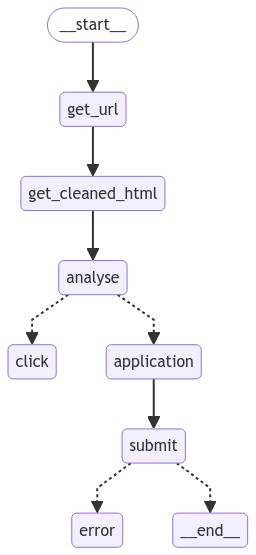

NameError: name 'bot' is not defined

In [3]:
from langgraph.graph import StateGraph,START,END
from typing import Annotated
from IPython.display import Image, display
from typing_extensions import TypedDict
class State(TypedDict):
    url: str
    html:BeautifulSoup
    query_element:pd.DataFrame
    qe:dict
    route:str
# go to next job, get jobs, go back, login, register, apply, analyse,
graph = StateGraph(State)


def get_url(state):
    if bot.driver.current_url != state['url']:
            bot.driver.get(state['url'])
    return {"url":bot.driver.current_url}

def get_cleaned_html(state):
        if bot != None:
            bot.driver.switch_to.window(bot.driver.window_handles[-1])
            html = set_nid(bot) 
        else : 
            html = state['html']
            
        html = BeautifulSoup(html,'html.parser')
        html = preprocess_html(html)
        html = wrap_text_in_tag(html)
        
        html = preprocess_form(html)
        query_element =  get_query_element_list(html)
        return {'html':html,'query_element':query_element}
action_key={
"login":   [ "login","sign in"],
"register":[    "sign up","register","create account"],
"application": [
"apply","easy apply","apply now",'anwenden','next','bewerben','continiue','interested','submit',"review"
],
"error":["this field is required","password is incorrect","username is incorrect","you have to accept"]
}
def isin(df,kwlist):
    x = df[df['label'].isin(kwlist)]
    if x.empty:
        return x
    display(x)
    idmax = x['score'].idxmax()
    row = x.loc[idmax,:]
    return row
    
def analyse(state: State):
    html:BeautifulSoup = state['html']
    query_element:pd.DataFrame = state['query_element']
    
    query_element = query_element.merge(find_doc_for_query(query_element['query'],Index2Key))
    apply_qe = isin(query_element,action_key['application'])
    display(apply_qe)
    forms=query_element[query_element['tag']=='form'].reset_index(drop=True)
    display(forms)
    if (not forms.empty):
        df = find_doc_for_query(forms['query'],forms_key)
        forms.update(df)
        display(forms)
        application_form = isin(forms,['application'])
        login_form = isin(forms,['login'])
        register_form = isin(forms,['register'])
        
        if not application_form.empty:
            return {'route':"application",'qe':application_form}
        elif not login_form.empty:
            return {'route':"login",'qe':login_form}
        elif not register_form.empty:
            return {'route':"register",'qe':register_form}
        
    if not apply_qe.empty:
            return {'route':"click",'qe':apply_qe}
    else:
            return {'route':"next_job",'qe':None}

def route(state):
    if state['route'] in ["login","register","application"]:
        return "application"

    return state['route']

def click(state):
        #if not state['qe'].empty: TODO:route
        nid = find_by_nid(state['qe']['nid'])
        print('click on',nid,'\n',state['qe'])
        bot.click_js(nid)
        time.sleep(1)
        #return {}
        
def submit(state):
    click(state)
    before:pd.DataFrame = state['query_element']
    after = get_cleaned_html(state)
    
    b = before.loc[before['tag'].isin(['input']),'query']
    a = after['query_element'].loc[after['query_element']['tag'].isin(['input']),'query']
    
    
    sim_ratio = len(set(b).intersection(set(a)))/len(b)
    
    
    if sim_ratio<0.8:
        print("end")
        return{ "route":END }
    
    
    return {"route":'error',
            "html":after['html'],
            "query_element":after['query_element'],
            "qe":state['html'].select('text[visible="true"]')}
    
    
def fill_form_input(query_element):
    for i,d in  query_element.iterrows(): 
            try:
                e = find_by_nid(d['nid'])
            except:
                continue
            try:
                e:WebElement
                print('--------------------------------------------')
                print("Label: ",d['label'],'\n',d['query'],d['element'])
                print('---------------------------------------------')
                fill_one_input(e,d)
                
            except Exception as e:
                print(e)
                
def application(state):
    qe = state['qe']
    print(qe)
    form:PageElement = qe['element']
    #fill input
    query_element = get_query_element_list(form)
    df = find_doc_for_query(query_element['query'],Index2Key)
    query_element = query_element.merge(df)
    display(query_element)
    fill_form_input(query_element)
    #apply_btn = isin(query_element,action_key[state['route']])
    #submit
    query_element = get_query_element_list(state['html'],'input[type="button"],input[type="submit"],button')
    df = find_doc_for_query(query_element['query'],Index2Key)
    query_element = query_element.merge(df)
    apply_btn = isin(query_element,action_key[state['route']])
    return {"route":"submit","qe":apply_btn}
    
    

    pass
    
        

#https://www.linkedin.com/jobs/collections/recommended/?currentJobId=3917084280&eBP=CwEAAAGQzw0MnkAitOjB7Q33j0bwzFpJDRmN25o-gTP5N-8AD8tHHzxPae-QiQDv7XhvMIcuJGwaKiiqIxx2dD2EBet8C-AC1ffA4HgsPG_ersjOqMnjBbCSdr7_aCqfl_RDsEpre7PH5I5kkoVy_66qdtQgXeqL2pEHTSLD4DQs8NymcNh1WN7a5wL0A2Rh6SaH9tmmKJGJMn7GQvqY1tQameUeAusQO_1VI7GL5TAkrwP4KGluW1rpqYCuGioO6SXsb8FYhtMjzl1zFR5WeDD1oTEODA2K5uT67N61U71Np64qSYwMa76o43meExvqjisldZ_KpFzER2Z0YPPoxwn0OLSVEVbbYHw2QAQoD3SCAdzc1XS40938_ePmhvhSpJFdOWNhnOZX4Mm5oVDnWtwd8KCgreCk4rxtmSKn7WFAdbBLlXWZCDhiT5WoLhZS5JIs&refId=q93pRiaKPDNI5P1p6C%2FbYw%3D%3D&trackingId=JwIPbqi%2B%2FBVAb1KnQoyG3g%3D%3D



def error(state):
    print("error state")
    query_element:pd.DataFrame = state['query_element']
    before = state['qe']
    before = set([t.text for t in before])
    
    html:BeautifulSoup = state['html']
    text = html.select('text[visible="true"]')
    text = set([t.text for t in text])
    text = list(text - before)
    df = find_doc_for_query(text,action_key['error'])
    display(df)
    
    
    #return {}
    
def end(state):
    print("end")
    
graph.add_node('get_cleaned_html',get_cleaned_html)
graph.add_node('get_url',get_url)


graph.add_node('analyse',analyse)
graph.add_node('click',click)
graph.add_node('application',application)
graph.add_node('error',error)
graph.add_node('submit',submit)


graph.add_edge(START,'get_url')
graph.add_edge('get_url','get_cleaned_html')

graph.add_edge('get_cleaned_html','analyse')
#graph.add_edge('application','click')
graph.add_edge('application','submit')
graph.add_edge('click','get_cleaned_html')
graph.add_conditional_edges('analyse',route,["application",'click'])
graph.add_conditional_edges('submit',route,["error",END])


#graph.add_conditional_edges("sum",select_next_func,["sum",END])
#graph.add_edge("sum",END)
graph = graph.compile()
display(Image(graph.get_graph().draw_mermaid_png()))
url = 'https://www.linkedin.com/jobs/view/3972084281/?eBP=NOT_ELIGIBLE_FOR_CHARGING&refId=mQGbse0bL5jasEtRDxqHBw%3D%3D&trackingId=wmVzNHaGmyV210hRoNjqmQ%3D%3D&trk=flagship3_search_srp_jobs'
url = 'https://jobs.koerber.com/supplychain/job/Bad-Nauheim-Graduates-and-newcomers-for-the-IT-logistics-world-%28mfd%29-Hess/734172001/'
#state = graph.invoke({"url":url})
#display(state['query_element'])
get_url({"url":url})
#x = get_cleaned_html({})
#error(x)



In [4]:
bot=None
data = pd.read_excel('click_data.xlsx')
display(data)
train_data = []
c = data['filename']=='end'
c = c.where(c==True)
ind = c.dropna().index
s = 0
for i in ind[0:]:
    train_data.append(data.loc[s:i,:])
    s = i


train_data

,outerHTML,filename
0,"<a xml:lang=""en-US"" lang=""en-US"" class=""btn bt...",2024-07-26T14_11_58_901Z.html
1,"<input type=""text"" name=""username"" id=""usernam...",2024-07-26T14_12_09_848Z.html
2,"<button onclick=""return validateFields();"" nid...",2024-07-26T14_12_12_683Z.html
3,"<a href=""/career?company=Koerber&amp;site=VjIt...",2024-07-26T14_12_19_767Z.html
4,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_39_430Z.html
5,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_41_786Z.html
6,"<input class=""form-control"" id=""fbclc_pwd"" typ...",2024-07-26T14_12_43_955Z.html
7,"<input class=""form-control"" type=""password"" si...",2024-07-26T14_12_48_094Z.html
8,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_49_664Z.html
9,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_50_868Z.html


[                                            outerHTML  \
 0   <a xml:lang="en-US" lang="en-US" class="btn bt...   
 1   <input type="text" name="username" id="usernam...   
 2   <button onclick="return validateFields();" nid...   
 3   <a href="/career?company=Koerber&amp;site=VjIt...   
 4   <input class="form-control" type="text" size="...   
 5   <input class="form-control" type="text" size="...   
 6   <input class="form-control" id="fbclc_pwd" typ...   
 7   <input class="form-control" type="password" si...   
 8   <input class="form-control" type="text" size="...   
 9   <input class="form-control" type="text" size="...   
 10  <select aria-required="true" aria-label="Count...   
 11  <input onblur="validateCrossBorderSearchPrefer...   
 12  <a aria-label="Terms of Use Read and accept th...   
 13  <button class=" globalPrimaryButton fd-button ...   
 14  <button id="fbclc_createAccountButton" name="f...   
 15                                                end   
 
            

In [5]:
td = train_data[0]
td

,outerHTML,filename
0,"<a xml:lang=""en-US"" lang=""en-US"" class=""btn bt...",2024-07-26T14_11_58_901Z.html
1,"<input type=""text"" name=""username"" id=""usernam...",2024-07-26T14_12_09_848Z.html
2,"<button onclick=""return validateFields();"" nid...",2024-07-26T14_12_12_683Z.html
3,"<a href=""/career?company=Koerber&amp;site=VjIt...",2024-07-26T14_12_19_767Z.html
4,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_39_430Z.html
5,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_41_786Z.html
6,"<input class=""form-control"" id=""fbclc_pwd"" typ...",2024-07-26T14_12_43_955Z.html
7,"<input class=""form-control"" type=""password"" si...",2024-07-26T14_12_48_094Z.html
8,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_49_664Z.html
9,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_50_868Z.html


In [6]:
import re
for i,x in td.iterrows():
    fn = re.sub(r'[:]', '_', x["filename"])
    with open(f'E:\downloads\chrome\{fn}','r',encoding='utf-8') as f:
        html = f.read()
        state = get_cleaned_html({'html':html})
        query_element = state['query_element']
        nids = query_element['nid']
        element_str = query_element['element'].map(lambda x: str(x))
        e = td.loc[i,'outerHTML']
        e = BeautifulSoup(e,'html.parser').find()
        nid = e['nid']
        condition = nid!=nids
        l =element_str[condition].to_json()
        td.loc[i,'negatives']=l
        td.loc[i,'negatives_query']=query_element.loc[condition,'query'].to_json()
        td.loc[i,'query']=query_element.loc[~condition,'query'].values[0]
        td.loc[i,'element']=element_str[~condition].values[0]
        s1=max(0,i-3)
        s2=i-1
        if s2<s1:
            td.loc[i,'history']='{}'
            td.loc[i,'history_query']='{}'
            
        else:
            td.loc[i,'history']=td.loc[s1:s2,'outerHTML'].to_json()
            td.loc[i,'history_query'] = td.loc[s1:s2,'query'].to_json()
        #break
        

C:\Users\Majid\AppData\Local\Temp\ipykernel_15260\3044396313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td.loc[i,'negatives']=l
C:\Users\Majid\AppData\Local\Temp\ipykernel_15260\3044396313.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td.loc[i,'negatives_query']=query_element.loc[condition,'query'].to_json()
C:\Users\Majid\AppData\Local\Temp\ipykernel_15260\3044396313.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\downloads\\chrome\\end'

In [194]:
element_str[~condition]

8    <a class="btn btn-primary btn-large btn-lg app...
Name: element, dtype: object

In [220]:
j= td.loc[14,'history_query']
#json.loads(j)
j

'{"11":"any company recruiter worldwide","12":"read and accept the data privacy statement","13":"accept"}'

In [7]:

display(td)

,outerHTML,filename,negatives,negatives_query,query,element,history,history_query
0,"<a xml:lang=""en-US"" lang=""en-US"" class=""btn bt...",2024-07-26T14_11_58_901Z.html,"{""0"":""<a aria-expanded=\""false\"" aria-haspopup...","{""0"":""language"",""1"":""sign in"",""2"":""employee lo...",apply now,"<a class=""btn btn-primary btn-large btn-lg app...",{},{}
1,"<input type=""text"" name=""username"" id=""usernam...",2024-07-26T14_12_09_848Z.html,"{""0"":""<a class=\""empLoginLink fontcolor24fb6d1...","{""0"":""employee login"",""1"":""loading ...",email address,"<input aria-describedby=""signIn_EmailError"" ar...","{""0"":""<a xml:lang=\""en-US\"" lang=\""en-US\"" cla...","{""0"":""apply now""}"
2,"<button onclick=""return validateFields();"" nid...",2024-07-26T14_12_12_683Z.html,"{""0"":""<a class=\""empLoginLink fontcolor24fb6d1...","{""0"":""employee login"",""1"":""loading ...",sign in register,"<button clickable=""true"" nid=""505"" onclick=""re...","{""0"":""<a xml:lang=\""en-US\"" lang=\""en-US\"" cla...","{""0"":""apply now"",""1"":""email address""}"
3,"<a href=""/career?company=Koerber&amp;site=VjIt...",2024-07-26T14_12_19_767Z.html,"{""0"":""<a class=\""empLoginLink fontcolor24fb6d1...","{""0"":""employee login"",""1"":""loading ...",create an account,"<a clickable=""true"" href=""/career?company=Koer...","{""0"":""<a xml:lang=\""en-US\"" lang=\""en-US\"" cla...","{""0"":""apply now"",""1"":""email address"",""2"":""sign..."
4,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_39_430Z.html,"{""0"":""<a class=\""empLoginLink fontcolor24fb6d1...","{""0"":""employee login"",""1"":""loading ...",email address,"<input aria-describedby=""fbclc_userName_error""...","{""1"":""<input type=\""text\"" name=\""username\"" i...","{""1"":""email address"",""2"":""sign in register"",""..."
5,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_41_786Z.html,"{""0"":""<a class=\""empLoginLink fontcolor24fb6d1...","{""0"":""employee login"",""1"":""loading ...",retype email address,"<input aria-describedby=""fbclc_emailConf_error...","{""2"":""<button onclick=\""return validateFields(...","{""2"":""sign in register"",""3"":""create an accoun..."
6,"<input class=""form-control"" id=""fbclc_pwd"" typ...",2024-07-26T14_12_43_955Z.html,"{""0"":""<a class=\""empLoginLink fontcolor24fb6d1...","{""0"":""employee login"",""1"":""loading ...",choose password,"<input aria-describedby=""fbclc_pwd_error rcmPw...","{""3"":""<a href=\""\/career?company=Koerber&amp;s...","{""3"":""create an account"",""4"":""email address"",""..."
7,"<input class=""form-control"" type=""password"" si...",2024-07-26T14_12_48_094Z.html,"{""0"":""<a class=\""empLoginLink fontcolor24fb6d1...","{""0"":""employee login"",""1"":""loading ...",retype password,"<input aria-describedby=""fbclc_pwdConf_error p...","{""4"":""<input class=\""form-control\"" type=\""tex...","{""4"":""email address"",""5"":""retype email address..."
8,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_49_664Z.html,"{""0"":""<a class=\""empLoginLink fontcolor24fb6d1...","{""0"":""employee login"",""1"":""loading ...",first name,"<input aria-describedby=""fbclc_fName_error"" ar...","{""5"":""<input class=\""form-control\"" type=\""tex...","{""5"":""retype email address"",""6"":""choose passwo..."
9,"<input class=""form-control"" type=""text"" size=""...",2024-07-26T14_12_50_868Z.html,"{""0"":""<a class=\""empLoginLink fontcolor24fb6d1...","{""0"":""employee login"",""1"":""loading ...",last name,"<input aria-describedby=""fbclc_lName_error"" ar...","{""6"":""<input class=\""form-control\"" id=\""fbclc...","{""6"":""choose password"",""7"":""retype password"",""..."


In [119]:
model_name = 'cross-encoder/msmarco-MiniLM-L12-en-de-v1'
model = CrossEncoder(model_name,cache_dir=cache_dir,device='cuda')
model

c:\Users\Majid\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Exception ignored in: <function _xla_gc_callback at 0x000001B547417E50>
Traceback (most recent call last):
  File "c:\Users\Majid\AppData\Local\Programs\Python\Python39\lib\site-packages\jax\_src\lib\__init__.py", line 99, in _xla_gc_callback
    xla_client._xla.collect_garbage()
KeyboardInterrupt: 


In [8]:
import datasets
from sentence_transformers import InputExample
td : pd.DataFrame
mypd = td[:-1]#[['history_query','query']]
train_dataset = []
inputlist = []
for i,x in mypd.iterrows():
    #print(i,x['negatives_query'])
    j = json.loads(x['negatives_query'])
    for v in j.values():
        train_dataset.append(InputExample(texts=[x['history_query'],v],label=0.0))
        
        pass
        
    inputlist.append([x['history_query'],x['query']])
    train_dataset.append(InputExample(texts=[x['history_query'],x['query']],label=1.0))
    #break


In [11]:
pd.DataFrame(train_dataset).to_excel('cross_dataset.xlsx')

In [9]:
from torch.utils.data.dataloader import DataLoader
dl = DataLoader(train_dataset,batch_size=1,collate_fn=model.smart_batching_collate)
len(dl)

NameError: name 'model' is not defined

In [133]:
next(iter(dl))


({'input_ids': tensor([[     0,  10666,   8152,  ...,      1,      1,      1],
         [     0,  10666,   8152,  ...,      1,      1,      1],
         [     0,  10666,   8152,  ...,      1,      1,      1],
         ...,
         [     0,  10666,     58,  ...,      1,      1,      1],
         [     0,  10666,     58,  ...,      1,      1,      1],
         [     0,  10666,     58,  ...,  80997, 107893,      2]],
        device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 1, 1, 1]], device='cuda:0')},
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        device='cuda:0'))

In [136]:
model.fit(
    train_dataloader=dl,
    #evaluator=evaluator,
    epochs=10,
    #warmup_steps=warmup_steps,
    output_path='./model/',
)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:01<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 368.00 MiB. GPU 0 has a total capacity of 4.00 GiB of which 189.26 MiB is free. Of the allocated memory 2.57 GiB is allocated by PyTorch, and 69.30 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [104]:
model.predict(inputlist)

array([1.4407477, 3.8268154, 6.9715986, 7.820042 , 9.180223 , 8.483517 ,
       7.965514 , 8.3108225, 7.96235  , 7.8811173, 5.8422837, 7.403855 ,
       5.631924 , 6.244382 , 4.9646144, 7.3480477], dtype=float32)

In [106]:
model.predict(inputlist)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


array([-7.4247203, -8.240202 , -6.554835 , -4.3992605,  4.8306675,
       -1.7064959, -3.2619383,  0.5424187, -1.585    , -0.6968736,
       -5.221083 , -3.6031718, -6.0594764, -5.925363 , -7.4232397,
        4.4196167], dtype=float32)